In [2]:
import json
import numpy as np

from graphviz import Digraph
import graphviz

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
data = {}
with open('../data/MVGComplex.json', 'r') as f:
    data = json.load(f)

In [10]:
foundOptimal = np.zeros(len(data.keys()))
numberGenerations = np.zeros(len(data.keys()), dtype=int)
maxFitness = np.zeros((len(data.keys()), 40000))
avgFitness = np.zeros((len(data.keys()), 40000))
bestG3 = [[]] * len(data.keys())
bestG4 = [[]] * len(data.keys())

for iter in data.keys():
    foundOptimal[int(iter)] = data[iter]['foundOptimal']
    numberGenerations[int(iter)] = int(data[iter]['numberGenerations'])
    maxFitness[int(iter), :] = np.array(data[iter]['maxFitness'])
    avgFitness[int(iter), :] = np.array(data[iter]['avgFitness'])
    bestG3[int(iter)] = data[iter]['bestG3']
    bestG4[int(iter)] = data[iter]['bestG4']

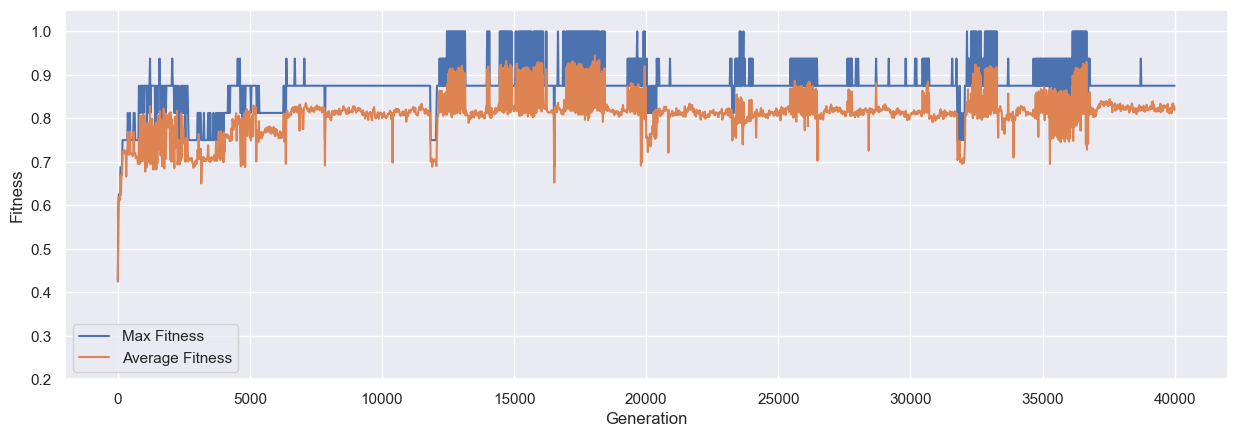

In [5]:
iter = 0
x = np.concatenate(([1], list(range(19, numberGenerations[iter], 20))))
max = np.concatenate(([maxFitness[iter, 0]], maxFitness[iter, 19:numberGenerations[iter]:20]))
avg = np.concatenate(([avgFitness[iter, 0]], avgFitness[iter, 19:numberGenerations[iter]:20]))


plt.figure().set_figwidth(15)
plt.plot(x, max, label='Max Fitness')
plt.plot(x, avg, label='Average Fitness')
plt.ylim(0.2, 1.05);
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.legend();

# Circuit Analysis

In [6]:
def createGraph(genome, numInputs, connectionSize):
    n = int((len(genome) - numInputs) / (2*connectionSize+2))
    graphReverse = {}

    for i in range(n):
        pointer = i * (connectionSize * 2 + 2)

        gate = genome[pointer] * 2 + genome[pointer+1]
        connection1 = 0
        connection2 = 0

        for j in genome[pointer+2:pointer+2+connectionSize]:
            connection1 = 2 * connection1 + j

        for j in genome[pointer+2+connectionSize:pointer+2+2*connectionSize]:
            connection2 = 2 * connection2 + j

        if gate != 3:
            graphReverse[i+numInputs] = [connection1, connection2]

    output = 0
    for j in genome[-connectionSize:]:
        output = 2 * output + j
    graphReverse[n+numInputs] = [output]

    return graphReverse

In [7]:
def createGraphviz(graph, name='graph'):
    dot = Digraph(name, format='svg')
    dot.attr(rankdir='UD')
    dot.attr('node', width='.4', fixedsize='true', shape='circle')

    dot.node(str(0), 'x')
    dot.node(str(1), 'y')
    dot.node(str(2), 'z')
    dot.node(str(3), 'w')
    dot.node(str(32), 'out')

    for u, edges in graph.items():
        for v in edges:
            if not v in graph and v >= 4:
                dot.node(str(v), '', shape='none')
            dot.edge(str(v), str(u))
            

    return dot

In [8]:
numInputs = 4  # number of inputs into network
connectionSize = 5  # num bits per connection

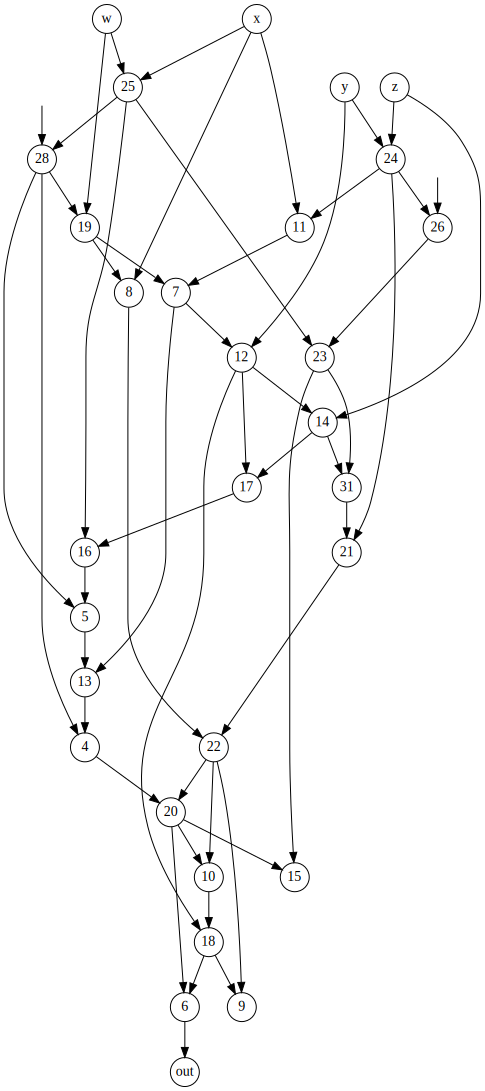

In [20]:
genome = bestG4[0][-1]
genome = [int(x) for x in genome]
graphReverse = createGraph(genome, numInputs, connectionSize)
dot = createGraphviz(graphReverse)
dot

# Figure Generation

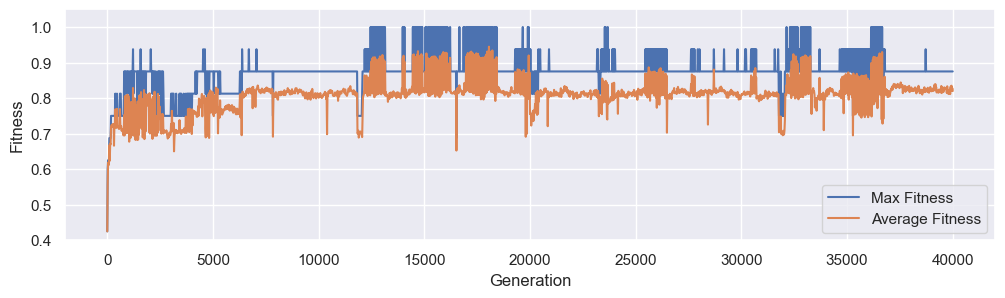

In [22]:
iter = 0
x = np.concatenate(([1], list(range(19, numberGenerations[iter], 20))))
maxFit = np.concatenate(([maxFitness[iter, 0]], maxFitness[iter, 19:numberGenerations[iter]:20]))
avgFit = np.concatenate(([avgFitness[iter, 0]], avgFitness[iter, 19:numberGenerations[iter]:20]))


fig = plt.figure()
fig.set_figwidth(12)
fig.set_figheight(3)
plt.plot(x, maxFit, label='Max Fitness')
plt.plot(x, avgFit, label='Average Fitness')
plt.ylim(0.4, 1.05);
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.legend()
plt.savefig('plots/MVGComplex.svg', format='svg')

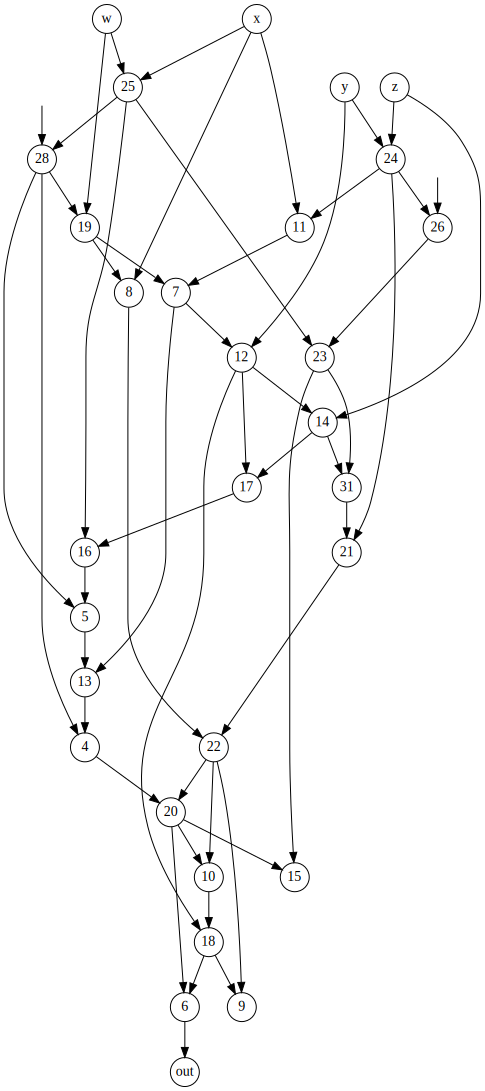

In [28]:
iter = 0
genome = bestG4[iter][-1]
genome = [int(x) for x in genome]
graphReverse = createGraph(genome, numInputs, connectionSize)
dot = createGraphviz(graphReverse, 'MVGComplexG4')
dot.render(directory='circuits')
dot

In [30]:
graphviz.render('dot', 'svg', 'circuits/MVGComplexG4.gv')

'circuits\\MVGComplexG4.gv.svg'